# Import Libraries

In [6]:
# Lets import all the modules, functions & objects for this project

In [5]:
# %load binary_class_libraries
import numpy
from numpy import set_printoptions
from matplotlib import pyplot
import pandas as pd
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Load Dataset


In [7]:
# I am going to load the dataset from my computer. The dataset is from UCI Machine Learning repo.

In [8]:
filename = 'diabetes.csv'

In [11]:
# read diabetes.csv into a DataFrame called filename
df = pd.read_csv(filename)

# Summary of the Dataset

In [12]:
# shape of the  DataFrame
df.shape

(768, 9)

In [21]:
# types
df.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
insu       int64
mass     float64
pedi     float64
age        int64
class     object
dtype: object

In [13]:
# view the first 5 rows of  the dataset
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [14]:
# Statistical summary 
df.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [20]:
#Class distribution
df.groupby('class').size()

class
tested_negative    500
tested_positive    268
dtype: int64

# Data Visualization

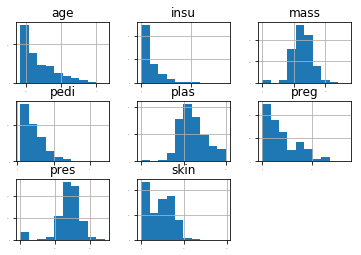

In [22]:
# histograms plots
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

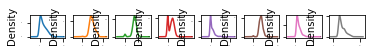

In [26]:
# density plots
df.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1)
pyplot.show()

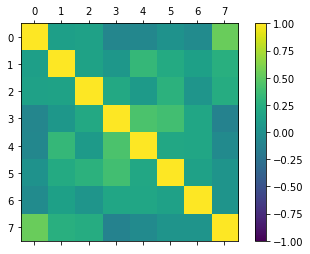

In [27]:
# correlation matrix
# plot of the correlations between attributes from the dataset
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()

# Evaluate Algorithms: Baseline

In [29]:
# Split-out validation dataset
array = df.values
X= array[:,0:8]
Y= array[:,8]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y, test_size=validation_size, random_state=seed)

In [30]:
# test options and evaluation metric
num_folds=10
seed = 7
scoring ='accuracy'

In [31]:
# Spot-Check algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


In [34]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.776864 (0.060738)
LDA: 0.773559 (0.058283)
KNN: 0.710153 (0.064599)
CART: 0.693839 (0.045284)
NB: 0.750820 (0.050575)
SVM: 0.656293 (0.044581)


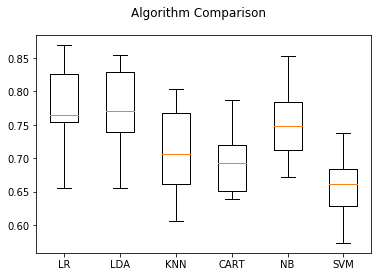

In [35]:
# Visualization of the Distribution of Algorithms Performance
# compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [36]:
# Evaluate the same algorithms on differents views of the dataset (normalized, standardized,..)

In [37]:
# standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

In [39]:
# evaluate each model in turn
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


ScaledLR: 0.780037 (0.061129)
ScaledLDA: 0.773559 (0.058283)
ScaledKNN: 0.718297 (0.071563)
ScaledCART: 0.674220 (0.039001)
ScaledNB: 0.750820 (0.050575)
ScaledSVM: 0.752565 (0.064295)


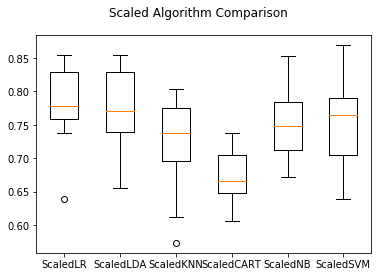

In [40]:
# Visualization of the Distribution of Algorithms Performance
# compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [41]:
# Algorithm Tuning

In [43]:
# Tuning KNN (tuning scaled KNN)
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.737785 using {'n_neighbors': 11}
0.701954 (0.075177) with: {'n_neighbors': 1}
0.734528 (0.068135) with: {'n_neighbors': 3}
0.713355 (0.067677) with: {'n_neighbors': 5}
0.731270 (0.069674) with: {'n_neighbors': 7}
0.734528 (0.068908) with: {'n_neighbors': 9}
0.737785 (0.067807) with: {'n_neighbors': 11}
0.734528 (0.074453) with: {'n_neighbors': 13}
0.729642 (0.084373) with: {'n_neighbors': 15}
0.729642 (0.067524) with: {'n_neighbors': 17}
0.726384 (0.072549) with: {'n_neighbors': 19}
0.724756 (0.071717) with: {'n_neighbors': 21}


In [44]:
# Tuning SVM (tuning scaled SVM)
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.780130 using {'kernel': 'linear', 'C': 0.1}
0.780130 (0.055334) with: {'kernel': 'linear', 'C': 0.1}
0.714984 (0.065472) with: {'kernel': 'poly', 'C': 0.1}
0.711726 (0.047876) with: {'kernel': 'rbf', 'C': 0.1}
0.767101 (0.059192) with: {'kernel': 'sigmoid', 'C': 0.1}
0.780130 (0.060070) with: {'kernel': 'linear', 'C': 0.3}
0.732899 (0.056577) with: {'kernel': 'poly', 'C': 0.3}
0.754072 (0.067008) with: {'kernel': 'rbf', 'C': 0.3}
0.755700 (0.059997) with: {'kernel': 'sigmoid', 'C': 0.3}
0.778502 (0.061289) with: {'kernel': 'linear', 'C': 0.5}
0.736156 (0.072558) with: {'kernel': 'poly', 'C': 0.5}
0.754072 (0.069600) with: {'kernel': 'rbf', 'C': 0.5}
0.755700 (0.049404) with: {'kernel': 'sigmoid', 'C': 0.5}
0.778502 (0.061289) with: {'kernel': 'linear', 'C': 0.7}
0.741042 (0.063253) with: {'kernel': 'poly', 'C': 0.7}
0.749186 (0.060901) with: {'kernel': 'rbf', 'C': 0.7}
0.741042 (0.046453) with: {'kernel': 'sigmoid', 'C': 0.7}
0.778502 (0.061289) with: {'kernel': 'linear', 'C': 

# Evaluate Ensemble Algorithms

In [45]:
# ensembles
# Spot-Check algorithms
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))

In [47]:
# evaluate each model in turn
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.724775 (0.063334)
GBM: 0.747435 (0.082235)
RF: 0.729535 (0.057713)
ET: 0.721549 (0.067833)


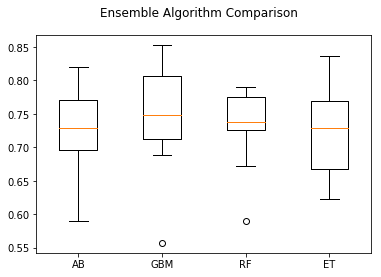

In [48]:
# Visualization of the Distribution of Algorithms Performance
# compare Algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Finalize Model

In [49]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5)
model.fit(rescaledX, Y_train)

SVC(C=1.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [50]:
# estimate the accauracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8116883116883117
[[89  8]
 [21 36]]
                 precision    recall  f1-score   support

tested_negative       0.81      0.92      0.86        97
tested_positive       0.82      0.63      0.71        57

    avg / total       0.81      0.81      0.81       154

